             image_path  color_score  symmetry_score  blue_white_score  age  \
0  PAT_1020_111_593.png            1               3                 0   41   
1  PAT_1022_115_132.png            2               3                 0   39   
2  PAT_1067_284_533.png            1               4                 1   55   
3   PAT_108_424_944.png            2               3                 0   69   
4  PAT_1130_501_181.png            2               2                 0   42   

  gender  smoke  drink pesticide background_father background_mother  \
0    NaN    NaN    NaN       NaN               NaN               NaN   
1    NaN    NaN    NaN       NaN               NaN               NaN   
2    NaN    NaN    NaN       NaN               NaN               NaN   
3   MALE  False  False      True         POMERANIA         POMERANIA   
4    NaN    NaN    NaN       NaN               NaN               NaN   

  skin_cancer_history cancer_history  
0                 NaN            NaN  
1             

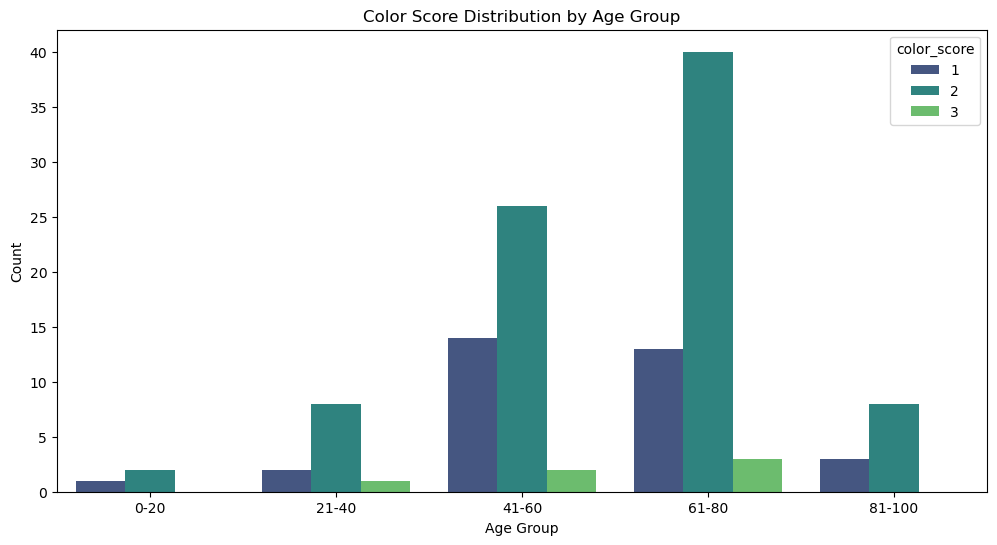

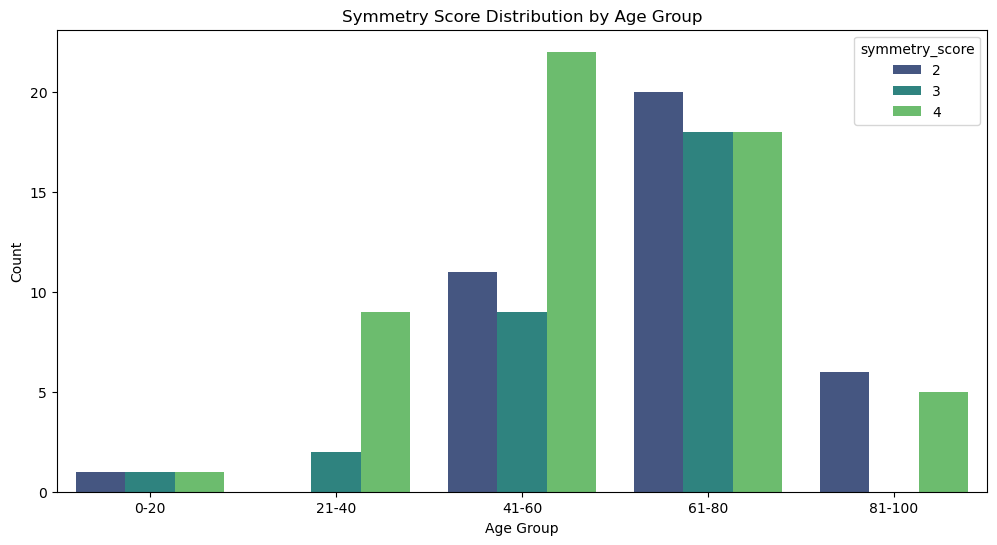

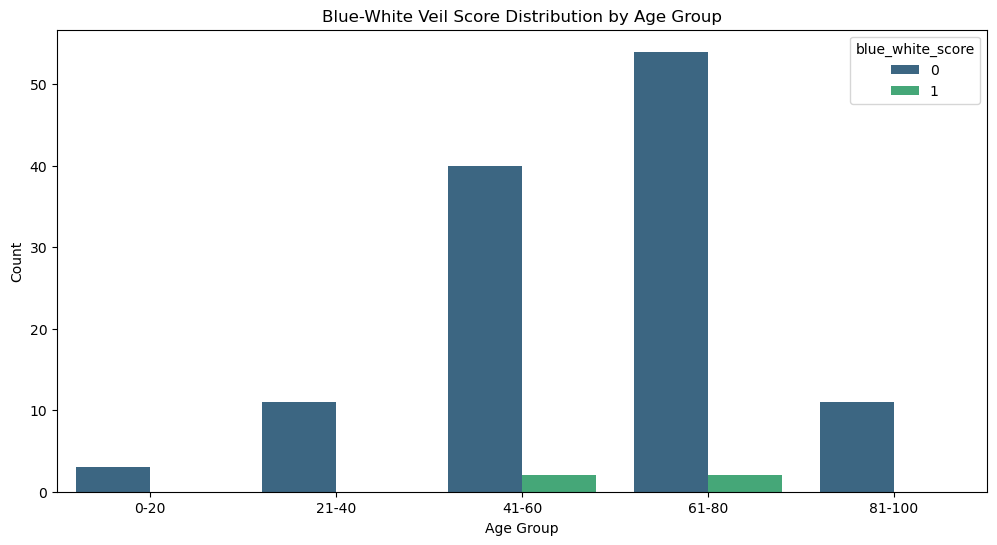

             image_path  color_score  symmetry_score  blue_white_score  age  \
0  PAT_1020_111_593.png            1               3                 0   41   
1  PAT_1022_115_132.png            2               3                 0   39   
2  PAT_1067_284_533.png            1               4                 1   55   
3   PAT_108_424_944.png            2               3                 0   69   
4  PAT_1130_501_181.png            2               2                 0   42   

  gender  smoke  drink pesticide background_father background_mother  \
0    NaN    NaN    NaN       NaN               NaN               NaN   
1    NaN    NaN    NaN       NaN               NaN               NaN   
2    NaN    NaN    NaN       NaN               NaN               NaN   
3   MALE  False  False      True         POMERANIA         POMERANIA   
4    NaN    NaN    NaN       NaN               NaN               NaN   

  skin_cancer_history cancer_history age_group  
0                 NaN            NaN     41

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

results_df = pd.read_csv('results_for_differences.csv')
metadata_df = pd.read_csv('metadata.csv')

merged_df = pd.merge(results_df, metadata_df[['img_id', 'age', 'gender', 'smoke', 'drink', 'pesticide', 'background_father', 'background_mother', 'skin_cancer_history', 'cancer_history']], how='left', left_on='image_path', right_on='img_id')
merged_df.drop(columns=['img_id'], inplace=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_results.csv', index=False)

print(merged_df.head())

# Create age groups
merged_df['age_group'] = pd.cut(merged_df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])


def create_countplot(data, feature, title, filename):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='age_group', hue=feature, data=data, palette='viridis')
    plt.title(title)
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.legend(title=feature)
    plt.savefig(f'{filename}')
    plt.show()

# Create count plots for color_score, symmetry_score, and blue_white_score
create_countplot(merged_df, 'color_score', 'Color Score Distribution by Age Group', 'color_score_distribution_by_age_group.png')
create_countplot(merged_df, 'symmetry_score', 'Symmetry Score Distribution by Age Group', 'symmetry_score_distribution_by_age_group.png')
create_countplot(merged_df, 'blue_white_score', 'Blue-White Veil Score Distribution by Age Group', 'blue_white_score_distribution_by_age_group.png')

# Print the merged DataFrame to verify the addition of new columns
print(merged_df.head())


In [19]:
from scipy.stats import f_oneway


anova_color = f_oneway(
    merged_df[merged_df['age_group'] == '0-20']['color_score'],
    merged_df[merged_df['age_group'] == '21-40']['color_score'],
    merged_df[merged_df['age_group'] == '41-60']['color_score'],
    merged_df[merged_df['age_group'] == '61-80']['color_score'],
    merged_df[merged_df['age_group'] == '81-100']['color_score']
)

anova_symmetry = f_oneway(
    merged_df[merged_df['age_group'] == '0-20']['symmetry_score'],
    merged_df[merged_df['age_group'] == '21-40']['symmetry_score'],
    merged_df[merged_df['age_group'] == '41-60']['symmetry_score'],
    merged_df[merged_df['age_group'] == '61-80']['symmetry_score'],
    merged_df[merged_df['age_group'] == '81-100']['symmetry_score']
)

anova_blue_white = f_oneway(
    merged_df[merged_df['age_group'] == '0-20']['blue_white_score'],
    merged_df[merged_df['age_group'] == '21-40']['blue_white_score'],
    merged_df[merged_df['age_group'] == '41-60']['blue_white_score'],
    merged_df[merged_df['age_group'] == '61-80']['blue_white_score'],
    merged_df[merged_df['age_group'] == '81-100']['blue_white_score']
)

print(f"ANOVA results for Color Score by Age Group: {anova_color}")
print(f"ANOVA results for Symmetry Score by Age Group: {anova_symmetry}")
print(f"ANOVA results for Blue-White Veil Score by Age Group: {anova_blue_white}")

# Save ANOVA results to a text file
with open('anova_results.txt', 'w') as f:
    f.write("ANOVA Analysis Results\n")
    f.write("====================\n\n")
    
    f.write("Color Score by Age Group:\n")
    f.write(str(anova_color) + "\n\n")
    
    f.write("Symmetry Score by Age Group:\n")
    f.write(str(anova_symmetry) + "\n\n")
    
    f.write("Blue-White Veil Score by Age Group:\n")
    f.write(str(anova_blue_white) + "\n\n")


ANOVA results for Color Score by Age Group: F_onewayResult(statistic=0.48032882623472056, pvalue=0.7501203190658721)
ANOVA results for Symmetry Score by Age Group: F_onewayResult(statistic=2.8778602191913207, pvalue=0.025723525538613266)
ANOVA results for Blue-White Veil Score by Age Group: F_onewayResult(statistic=0.2815482502651115, pvalue=0.8894348037350226)
